# Inferential Statistics

- Data Collection
    - Data Collection: https://www.scribbr.com/methodology/data-collection/
    - Sampling, Randomness, and Probability
        - Story: Lady Tasting Tea
- Inferential Statistics
    - Experimental Design: https://www.scribbr.com/methodology/experimental-design/
        - Observational Studies vs. Experimental Studies
        - Randomized Controlled Trials
        - Hierarchy of Scientific Evidence
        - Sample Size
    - Estimation
        - The Bootstrap
            - Confidence Intervals
        - Central Limit Theorem
        - Normal distribution
            - t-distribution
    - Testing hypothesis
        - A/B Testing
            - Permutation test
        - The Distance between Two Distributions
        - T-test
        - Chi-square test

- ***Descriptive Statistics*** stops at summarizing the data with sample statistics (e.g., $\bar x$, $s$).
- ***Inferential Statistics*** goes beyond that to:
    1. estimate population parameters (e.g., $\mu$, $\sigma$)
    2. test alternative hypotheses $H_a$ against presumptions $H_0$ to verify a claim through data

<img src="https://datatab.net/assets/tutorial/Descriptive_statistics_and_inferential_statistics.png">

Source: Datatab.

![Inferential Statistics](../assets/inferential-statistics.png)

1. ***Estimation***: make informed guess about population parameters. Example:
    - How many people in the population are obese?
    - What is the median income of housesholds in region X?
2. ***Comparison***: finding out if differences are actually caused by some variable(s), or just due to random chance. Example:
    - What is the impact of a new drug on the recovery time of patients?
    - What is the impact of a new teaching method on student performance?
3. ***Relationships***: quantifying the magnitude of the relationship between to variables, where we can do a “what if” analysis. Example:
    - How much more can a house sell for an additional bedroom?
    - What is the impact of lot size on housing price?

### Key Terms in statistics

* **Population:** The entire set of individuals or objects that a researcher is interested in studying.
* **Sample:** A subset of a population that is selected to represent the population as a whole.
* **Variable:** A characteristic of a population or sample that can vary from one individual or object to another.
* **Measurement:** A value that is obtained by observing a variable.
* **Parameter:** A characteristic of a population that can be measured and quantified.
* **Statistic:** A value that is calculated from a sample and used to estimate a population parameter.

#### Examples

1. **Drug Study Example**:
    - Population: All people (potentially).
    - Sample: A random sample of 500 individuals from the drug study.
    - Variable: Blood pressure.
    - Measurement: The blood pressure of an individual.
    - Parameter: The average blood pressure of all individuals in the drug study.
    - Statistic: The average blood pressure of the individuals in the sample.
    - Outliers: Individuals with unusually high or low blood pressure values may be present.

2. **Tutoring Program Example**:
    - Population: All students in the tutoring program.
    - Sample: A random sample of 200 students from the tutoring program.
    - Variable: Test scores.
    - Measurement: The test scores of a student.
    - Parameter: The mean difference in test scores for all students in the tutoring program.
    - Statistic: The mean difference in test scores for the students in the sample.
    - Outliers: Students with significantly different test scores may be present.

### Parameters vs Statistics

- A parameter is a characteristic of a population. Mneumonic: "P" for "population".
- A statistic is a characteristic of a sample. Mneumonic: "S" for "sample".

For example, the mean height of the population is a parameter, whereas the mean height of a sample is a statistic.

| Parameter / Statistic | Population | Sample |
|---|---|---|
| mean | $μ$  | $\overline{x}$ |
| standard deviation | $σ$ | $s$ |
| proportion | $p$ | $\hat{p}$ |

#### Exercise

Complete the following example for *University Students* (make up your own experiment):
- Population:
- Sample: 
- Variable:
- Measurement:
- Parameter:
- Statistic:
- Outliers:

# The Central Limit Theorem

The Central Limit Theorem states that the distribution of sample means approximates a normal distribution regardless of the shape of the population distribution, under two conditions:

1. larger sample sizes (n > 30) are used, and
2. we repeat the sampling process many times (e.g., 1000 times)

That is, if we take $k=1000$ sample means $(\bar x_1, \bar x_2, ..., \bar x_k)$, each of which is of size, say, $n=50$, and draw the distribution of them, we get a the gaussian distribution, that is centered around the population mean $\mu$ that we are trying to estimate.


<img src="../assets/clt.jpg" alt="Figure: Central Limit Theorem">

Image Source: https://en.wikipedia.org/wiki/Central_limit_theorem#/media/File:IllustrationCentralTheorem.png

This means we can infer with great confidence where the population mean is located. This is the basis of hypothesis testing and confidence intervals.

### Emperically Proving the Central Limit Theorem

In [3]:
from scipy import stats
import numpy as np

# Generate random samples from a uniform distribution
population = stats.uniform.rvs(size=1000) 

# Take samples of size 30 from the population
sample_size = 30
num_samples = 1000

samples = np.empty((num_samples, sample_size))
for i in range(num_samples):
    samples[i,] = np.random.choice(population, size=sample_size)

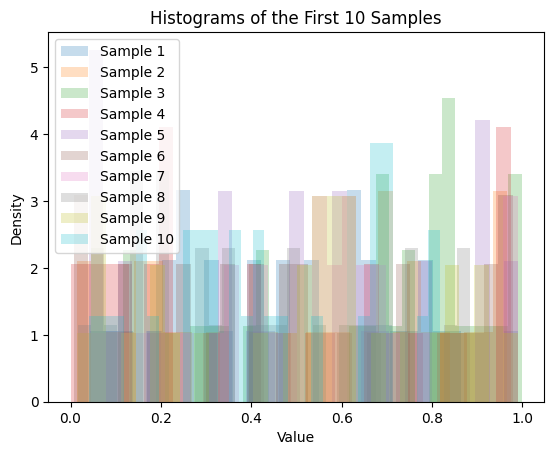

In [4]:
import matplotlib.pyplot as plt

# Plot the histograms of the first 10 samples
samples_to_plot = 10
for i in range(samples_to_plot):
    plt.hist(samples[i], bins=30, density=True, alpha=0.25, label=f"Sample {i+1}")

plt.xlabel("Value")
plt.ylabel("Density")
plt.title(f"Histograms of the First {samples_to_plot} Samples")
plt.legend()
plt.show()


In [5]:
sample_means = samples.mean(axis=1)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


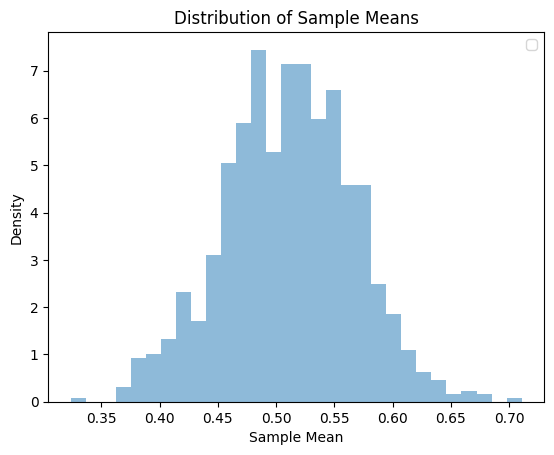

In [11]:
plt.hist(sample_means, bins=30, density=True, alpha=0.50)
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Distribution of Sample Means")

plt.legend()
plt.show()

## Statistics Estimation with Confidence

#### Point vs Interval Estimators

- A point estimator identifies one single value to estimate a parameter. Example: $\mu = 65$
- An interval estimator identifies a range of values to estimate a parameter. Example: $\mu \in (60, 70)$
    - The most common type of interval estimator is the **Confidence Interval**.

### Standard Error

- *Standard Deviation* $\sigma$ measures the speard of data distribution
- *Sample Standard Deviation* $s$ measures the spread of a sample distribution
- ***Standard Error*** $\sigma_{\bar{x}}$ measures the spread of the sampling statistic distribution
    - It quantifies how much a sample mean is likely to differ from draw to draw if we were to take many samples from the population and calculate the mean of each one.

It can be estimated using a statistic based on the standard deviation $s$ of the sample values, and the sample size $n$:

$$

\sigma_{\bar x} = \frac{s}{\sqrt{n}}

$$

(The relationship between standard error and sample size is sometimes referred to as the square root of $n$ rule: to reduce the standard error by a factor of 2, the sample size must be increased by a factor of 4.)

### Confidence Intervals

Confidence intervals are made of two parts:
1. **Point Estimator**: $\bar{x}$
1. **Margin of Error**: $t \frac{s}{\sqrt{n}}$

Note: $t(\alpha, n)$ is the t-score (looked up from the t-table) that corresponds to the desired confidence level $\alpha$ and sample size $n$.

The equation for the ***Confidence Interval*** for the population mean $\mu$:

$$
\text{CI}: \bar x \pm t \frac{s}{\sqrt{n}} = (\text{lower}, \text{upper})
$$

- The equation reflects the positive relationship between $\sigma$ (variation in the population) and $s$ (variation in the sample).
- The equation also makes $n$ inversley proprtional, because we expect more information about the population to be contained in a larger sample, than a smaller one.
    - $\sqrt{n}$: the square root reflects the fact that as we take larger and larger samples, we expect diminishing gain in information about the population

### Confidence Level

***Confidence levels*** vary by field, but the general rule of thumb is to reduce it with **lack of information** about the population characteristics.

Common confidence levels are:

- Scientists and engineers work with a level of $95\%$ or more
- Governmental organizations and departments use $90\%$

A higher confidence level requires a larger sample size to produce a confidence interval with the same width.

For a fixed Confidence *Level* (say: $95\%$), we observe decreasing Confidence *Intervals* ($CI$) with the increase of sample size ($n$). In other words, the larger the sample size, the more precise the estimate.

Conversely, for a fixed sample size ($n$), we observe decreasing Confidence *Intervals* ($CI$) with the increase of Confidence *Level* ($90\% \rarr 95\%$). In other words, the higher the confidence level, the wider the confidence interval.

#### Draw the 95% Confidence Interval

Let's draw the 95% CI of students' scores. It is simply the area that includes 95% of the sampling statistic; i.e., the sample means.

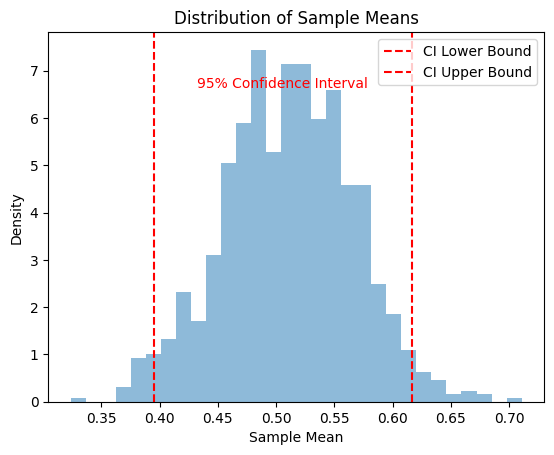

In [ ]:
plt.hist(sample_means, bins=30, density=True, alpha=0.50)
plt.xlabel("Sample Mean")
plt.ylabel("Density")
plt.title("Distribution of Sample Means")

# Calculate the confidence interval
confidence_level = 0.95
lower, upper = np.percentile(sample_means, [(1-confidence_level)/2*100, (1+confidence_level)/2*100])

# Draw the confidence interval
plt.axvline(lower, color='red', linestyle='--', label='CI Lower Bound')
plt.axvline(upper, color='red', linestyle='--', label='CI Upper Bound')
plt.text((lower + upper) / 2, plt.ylim()[1] * 0.85, '95% Confidence Interval', ha='center', color='red')

plt.legend()
plt.show()

> A 95% confidence interval is the area under the curve of the sampling distribution of a statistic (say, the mean: $\bar x$) that sum up to 95%.


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/f/f9/Margin-of-error-95.svg/1200px-Margin-of-error-95.svg.png" height="500">

Figure: Probability densities of polls of different sizes, each color-coded to its 95% confidence interval (below), margin of error (left), and sample size (right). Each interval reflects the range within which one may have 95% confidence that the true percentage may be found, given a reported percentage of 50%. The margin of error is half the confidence interval (also, the radius of the interval). The larger the sample, the smaller the margin of error. Also, the further from 50% the reported percentage, the smaller the margin of error.

Source: https://en.wikipedia.org/wiki/Margin_of_error